# Ejercicio 1

Seleccione dos dataset de los propuestos por su persona en una anterior tarea. Realice los incisos a, b y c

Importacion de Librerias

In [445]:
import pandas as pd
import numpy as np
from math import sqrt
from statistics import mode

Funciones:

In [446]:
def obtmedia(array,columna,numfilas):
    media=0.0
    for i in range(numfilas):
        media=media+float(array[i][columna])
    media=media/(array.shape[0]) 
    return media
def obtmedesv(array, media,columna,numfilas):
    desv=0.0
    for i in range(numfilas):
        desv=desv+(float(array[i][columna])- media)**2
    desv=desv/(numfilas)
    desv=sqrt(desv)
    return desv

def obtmoda(array,columna,numfilas):
    frequencia = {}
    for i in range(numfilas):
        value=array[i][columna]
        frequencia[value]=frequencia.get(value, 0) + 1
    mas_frecuente = max(frequencia.values())
    moda = [key for key, value in frequencia.items()
                      if value == mas_frecuente]
    return moda
def columna(array,filas,columna):
    lista2 = np.zeros(filas)
    for i in range(filas): 
        lista2[i]=float(array[i][columna])
        #print(lista2[i])
    return lista2

# Primer Dataset

Dataset corazon.csv, para el diagnostico de enfermedades cardiacas

Leyendo archivo csv

In [447]:
data= pd.read_csv("corazon.csv", sep=",", header=[0])
arrayCora=np.asarray(data)
names=["Edad","Sexo","Tipo de Dolor de Pecho","Presion Arterial Reposo","Coresterol",
       "Azucar en Ayunas","Resultados del electrocardiograma en Reposo","Frecuencia cardíaca máxima alcanzada",
      "Angina inducida por Ejercicio","Pico antiguo","Pendiente del pico","Diagnostico"]

print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


a) La media, moda y la desviación estándar por columna; explique qué significa en cada caso mediante Python sin uso de librerías

In [448]:
numcolumnas=int(arrayCora.shape[1])
numfilas=int(arrayCora.shape[0])
print()
#Imprimiendo
for i in range(12):
    print (names[i])
    print ("------------------------------------------------")
    if (i==0)|(i==3)|(i==4)|(i==7)|(i==9):
        media_p=obtmedia(arrayCora,i,numfilas)
        print ("Media    :",media_p)
        moda_p=obtmoda(arrayCora,i,numfilas)
        if(moda_p.__len__()>=int(numfilas)/2):
            print("No existe Moda")
        else:
            if( moda_p.__len__()>1 ):
                print("Es multimodal: ")
            print ("Moda     :",moda_p)
        print ("Desviacion :",obtmedesv(arrayCora, media_p,i,numfilas))
        print("")
    else:
        moda_p=obtmoda(arrayCora,i,numfilas)
        if(moda_p.__len__()>=int(numfilas)/2):
            print("No existe Moda")
        else:
            if( moda_p.__len__()>1 ):
                print("Es multimodal: ")
            print ("Moda     :",moda_p)
        print("")


Edad
------------------------------------------------
Media    : 53.510893246187365
Moda     : [54]
Desviacion : 9.427477516153491

Sexo
------------------------------------------------
Moda     : ['M']

Tipo de Dolor de Pecho
------------------------------------------------
Moda     : ['ASY']

Presion Arterial Reposo
------------------------------------------------
Media    : 132.39651416122004
Moda     : [120]
Desviacion : 18.504067410295104

Coresterol
------------------------------------------------
Media    : 198.7995642701525
Moda     : [0]
Desviacion : 109.32455089779246

Azucar en Ayunas
------------------------------------------------
Moda     : [0]

Resultados del electrocardiograma en Reposo
------------------------------------------------
Moda     : ['Normal']

Frecuencia cardíaca máxima alcanzada
------------------------------------------------
Media    : 136.80936819172112
Moda     : [150]
Desviacion : 25.44646307530938

Angina inducida por Ejercicio
--------------------

b) La media, la moda, la desviación estándar con el uso de numpy y pandas

In [449]:
for i in range(12):
    print (names[i])
    print ("------------------------------------------------")
    if (i==0)|(i==3)|(i==4)|(i==7)|(i==9):
        columna_l=columna(arrayCora,numfilas,i)
        print("Media       :",np.mean(columna_l))
        print("Moda        :",mode(columna_l))  
        print("Desviacion :",columna_l.std())
        print()
    else:
        print("")
        moda_p=obtmoda(arrayCora,i,numfilas)
        if(moda_p.__len__()>=int(arrayCora.shape[0])/2):
            print("No existe Moda")
        else:
            if( moda_p.__len__()>1 ):
                print("Es multimodal: ")
            print ("Moda        :",moda_p)
        print()


Edad
------------------------------------------------
Media       : 53.510893246187365
Moda        : 54.0
Desviacion : 9.427477516153495

Sexo
------------------------------------------------

Moda        : ['M']

Tipo de Dolor de Pecho
------------------------------------------------

Moda        : ['ASY']

Presion Arterial Reposo
------------------------------------------------
Media       : 132.39651416122004
Moda        : 120.0
Desviacion : 18.504067410295093

Coresterol
------------------------------------------------
Media       : 198.7995642701525
Moda        : 0.0
Desviacion : 109.32455089779256

Azucar en Ayunas
------------------------------------------------

Moda        : [0]

Resultados del electrocardiograma en Reposo
------------------------------------------------

Moda        : ['Normal']

Frecuencia cardíaca máxima alcanzada
------------------------------------------------
Media       : 136.80936819172112
Moda        : 150.0
Desviacion : 25.44646307530939

Angina indu

c) Grafique los datos y explique su comportamiento (PYTHON)

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Graficando:

<ipython-input-451-7715ed71df2e>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

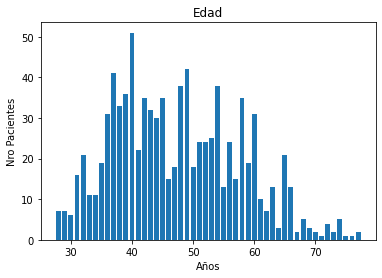

In [451]:
valores_x=data["Age"].unique()
valores_y=data["Age"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[0])
ax=plt.subplot()
ax.set_xlabel("Años")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-452-078c8f0af8c4>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

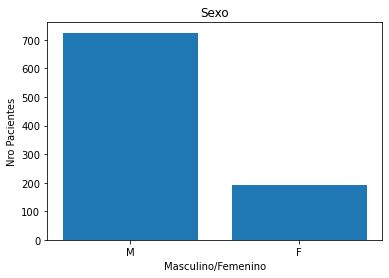

In [452]:
plt.close("all")
valores_x=data["Sex"].unique()
valores_y=data["Sex"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[1])
ax=plt.subplot()
ax.set_xlabel("Masculino/Femenino")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-453-e2cb19269cbe>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

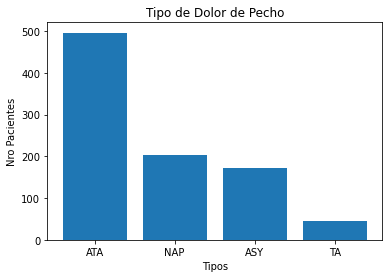

In [453]:
plt.close("all")
valores_x=data["ChestPainType"].unique()
valores_y=data["ChestPainType"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[2])
ax=plt.subplot()
ax.set_xlabel("Tipos")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-454-b806cfc4e728>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

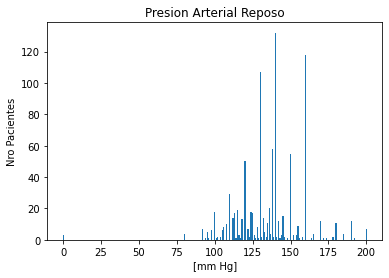

In [454]:
plt.close("all")
valores_x=data["RestingBP"].unique()
valores_y=data["RestingBP"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[3])
ax=plt.subplot()
ax.set_xlabel("[mm Hg]")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-455-a1de3469461b>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

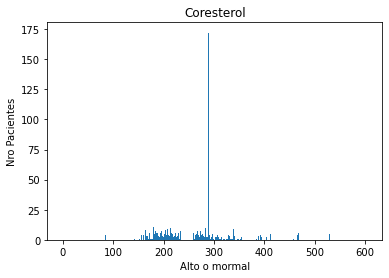

In [455]:
plt.close("all")
valores_x=data["Cholesterol"].unique()
valores_y=data["Cholesterol"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[4])
ax=plt.subplot()
ax.set_xlabel("Alto o mormal")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-456-3891f77025fa>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

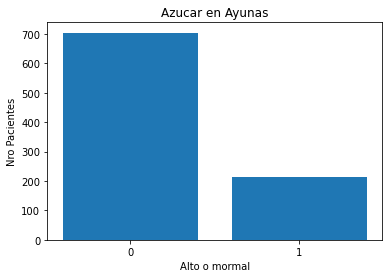

In [456]:
plt.close("all")
valores_x=data["FastingBS"].unique()
valores_y=data["FastingBS"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[5])
ax=plt.subplot()
ax.set_xlabel("Alto o mormal")
ax.set_ylabel("Nro Pacientes")
ax.set_xticks(valores_x)
ax.set_xticklabels(valores_x)
plt.show

<ipython-input-457-ac18ed1f1a22>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

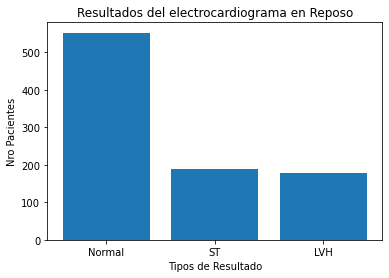

In [457]:
plt.close("all")
valores_x=data["RestingECG"].unique()
valores_y=data["RestingECG"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[6])
ax=plt.subplot()
ax.set_xlabel("Tipos de Resultado")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-458-565eb0869579>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

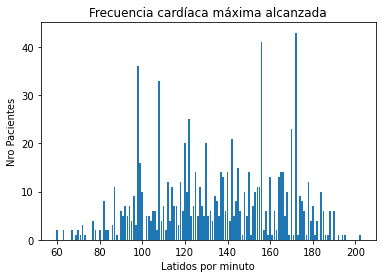

In [458]:
plt.close("all")
valores_x=data["MaxHR"].unique()
valores_y=data["MaxHR"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[7])
ax=plt.subplot()
ax.set_xlabel("Latidos por minuto")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-459-4d0edddea3f9>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

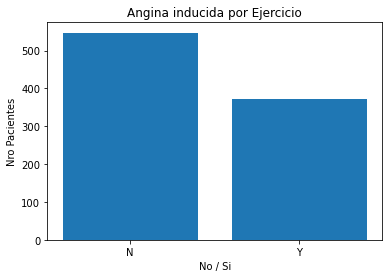

In [459]:
plt.close("all")
valores_x=data["ExerciseAngina"].unique()
valores_y=data["ExerciseAngina"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[8])
ax=plt.subplot()
ax.set_xlabel("No / Si")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-460-aa092c261c97>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

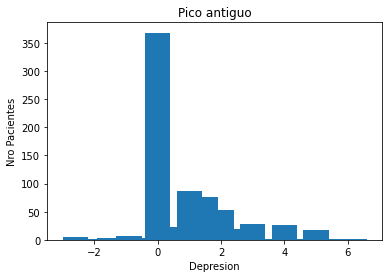

In [460]:
plt.close("all")
valores_x=data["Oldpeak"].unique()
valores_y=data["Oldpeak"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[9])
ax=plt.subplot()
ax.set_xlabel("Depresion")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-461-792e05202498>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

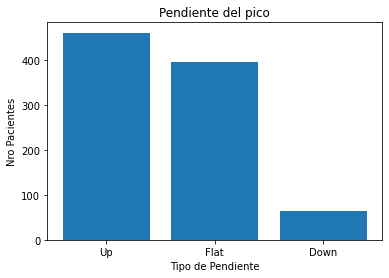

In [461]:
plt.close("all")
valores_x=data["ST_Slope"].unique()
valores_y=data["ST_Slope"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[10])
ax=plt.subplot()
ax.set_xlabel("Tipo de Pendiente")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-462-dec180201d15>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()
<ipython-input-462-dec180201d15>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(valores_x)


<function matplotlib.pyplot.show(close=None, block=None)>

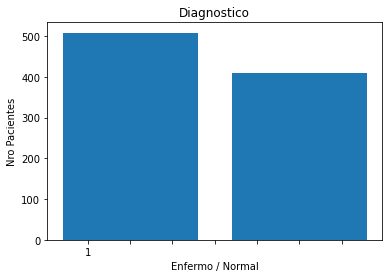

In [462]:
plt.close("all")
valores_x=data["HeartDisease"].unique()
valores_y=data["HeartDisease"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[11])
ax=plt.subplot()
ax.set_xlabel("Enfermo / Normal")
ax.set_ylabel("Nro Pacientes")
ax.set_xticklabels(valores_x)
plt.show

# Segundo Dataset

Dataset diabetes.csv, para el diagnostico de la enfermedad diabetes

Leyendo archivo:

In [463]:
data= pd.read_csv("diabetes.csv", sep=",", header=[0])
arrayDiab=np.asarray(data)
names=["Número de embarazos","Concentración de glucosa","Presión arterial diastólica",
       "Espesor del pliegue cutáneo del tríceps","Insulina sérica",
       "Índice de masa corporal","Función del pedigrí de la diabetes",
       "Edad","Resultsdo Test"]
print(data.head())

   id  preg  plas  pres  skin  insu  mass   pedi  age            class
0   1     6   148    72    35     0  33.6  0.627   50  tested_positive
1   2     1    85    66    29     0  26.6  0.351   31  tested_negative
2   3     8   183    64     0     0  23.3  0.672   32  tested_positive
3   4     1    89    66    23    94  28.1  0.167   21  tested_negative
4   5     0   137    40    35   168  43.1  2.288   33  tested_positive


a) La media, moda y la desviación estándar por columna; explique qué significa en cada caso mediante Python sin uso de librerías

In [464]:
numcolumnas=int(arrayDiab.shape[1])
numfilas=int(arrayDiab.shape[0])
print()
#Imprimiendo
for i in range(9):
    print (names[i])
    print ("------------------------------------------------")
    if (i!=8):
        media_p=obtmedia(arrayDiab,i+1,numfilas)
        print ("Media    :",media_p)
        moda_p=obtmoda(arrayDiab,i+1,numfilas)
        if(moda_p.__len__()>=int(numfilas)/2):
            print("No existe Moda")
        else:
            if( moda_p.__len__()>1 ):
                print("Es multimodal: ")
            print ("Moda     :",moda_p)
        print ("Desviacion :",obtmedesv(arrayDiab, media_p,i+1,numfilas))
        print("")
    else:
        moda_p=obtmoda(arrayDiab,i+1,numfilas)
        if(moda_p.__len__()>=int(numfilas)/2):
            print("No existe Moda")
        else:
            if( moda_p.__len__()>1 ):
                print("Es multimodal: ")
            print ("Moda     :",moda_p)
        print("")


Número de embarazos
------------------------------------------------
Media    : 3.8450520833333335
Moda     : [1]
Desviacion : 3.3673836124089886

Concentración de glucosa
------------------------------------------------
Media    : 120.89453125
Es multimodal: 
Moda     : [100, 99]
Desviacion : 31.95179590820272

Presión arterial diastólica
------------------------------------------------
Media    : 69.10546875
Moda     : [70]
Desviacion : 19.343201628981696

Espesor del pliegue cutáneo del tríceps
------------------------------------------------
Media    : 20.536458333333332
Moda     : [0]
Desviacion : 15.941828626496978

Insulina sérica
------------------------------------------------
Media    : 79.79947916666667
Moda     : [0]
Desviacion : 115.1689492646728

Índice de masa corporal
------------------------------------------------
Media    : 31.992578124999977
Moda     : [32.0]
Desviacion : 7.879025731540125

Función del pedigrí de la diabetes
----------------------------------------

b) La media, la moda, la desviación estándar con el uso de numpy y pandas

In [465]:
for i in range(9):
    print (names[i])
    print ("------------------------------------------------")
    if (i!=8):
        columna_l=columna(arrayDiab,numfilas,i+1)
        print("Media       :",np.mean(columna_l))
        print("Moda        :",mode(columna_l))  
        print("Desviacion :",columna_l.std())
        print()
    else:
        print("")
        moda_p=obtmoda(arrayDiab,i+1,numfilas)
        if(moda_p.__len__()>=int(numfilas)/2):
            print("No existe Moda")
        else:
            if( moda_p.__len__()>1 ):
                print("Es multimodal: ")
            print ("Moda        :",moda_p)
        print()


Número de embarazos
------------------------------------------------
Media       : 3.8450520833333335
Moda        : 1.0
Desviacion : 3.3673836124089958

Concentración de glucosa
------------------------------------------------
Media       : 120.89453125
Moda        : 100.0
Desviacion : 31.95179590820272

Presión arterial diastólica
------------------------------------------------
Media       : 69.10546875
Moda        : 70.0
Desviacion : 19.343201628981696

Espesor del pliegue cutáneo del tríceps
------------------------------------------------
Media       : 20.536458333333332
Moda        : 0.0
Desviacion : 15.941828626496939

Insulina sérica
------------------------------------------------
Media       : 79.79947916666667
Moda        : 0.0
Desviacion : 115.16894926467262

Índice de masa corporal
------------------------------------------------
Media       : 31.992578124999998
Moda        : 32.0
Desviacion : 7.87902573154013

Función del pedigrí de la diabetes
---------------------------

c) Grafique los datos y explique su comportamiento (PYTHON)

<ipython-input-466-e1b3df0a94c2>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

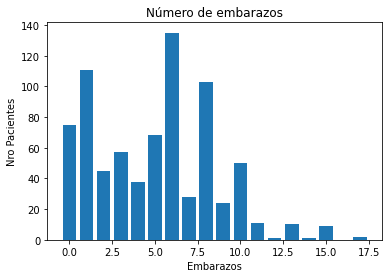

In [466]:
plt.close("all")
valores_x=data["preg"].unique()
valores_y=data["preg"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[0])
ax=plt.subplot()
ax.set_xlabel("Embarazos")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-467-21d1e442726b>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

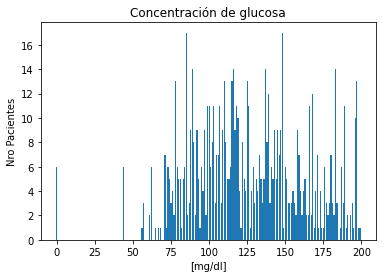

In [467]:
plt.close("all")
valores_x=data["plas"].unique()
valores_y=data["plas"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[1])
ax=plt.subplot()
ax.set_xlabel("[mg/dl]")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-468-abfb5e482c62>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

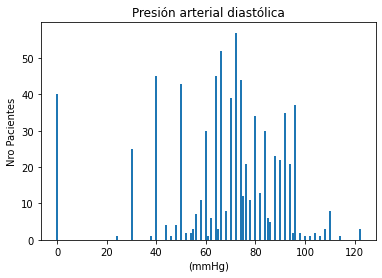

In [468]:
plt.close("all")
valores_x=data["pres"].unique()
valores_y=data["pres"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[2])
ax=plt.subplot()
ax.set_xlabel("(mmHg)")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-469-f7644a59dd3f>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

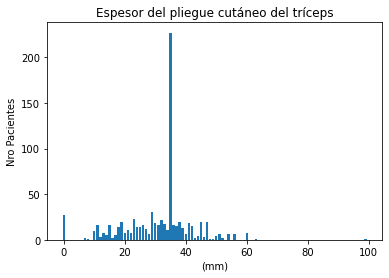

In [469]:
plt.close("all")
valores_x=data["skin"].unique()
valores_y=data["skin"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[3])
ax=plt.subplot()
ax.set_xlabel("(mm)")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-470-589f17283fc2>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

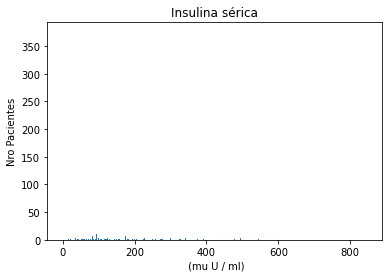

In [470]:
plt.close("all")
valores_x=data["insu"].unique()
valores_y=data["insu"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[4])
ax=plt.subplot()
ax.set_xlabel(" (mu U / ml)")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-471-d68dc8624ca3>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

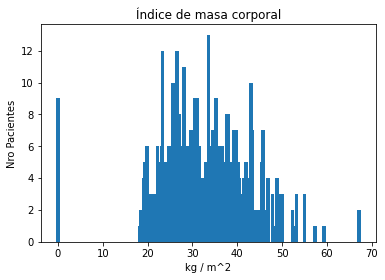

In [471]:
plt.close("all")
valores_x=data["mass"].unique()
valores_y=data["mass"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[5])
ax=plt.subplot()
ax.set_xlabel("kg / m^2")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-472-82befeba3325>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

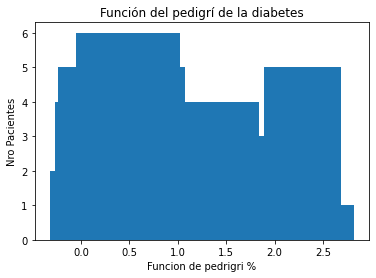

In [472]:
plt.close("all")
valores_x=data["pedi"].unique()
valores_y=data["pedi"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[6])
ax=plt.subplot()
ax.set_xlabel("Funcion de pedrigri %")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-473-d3735ccc53cc>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

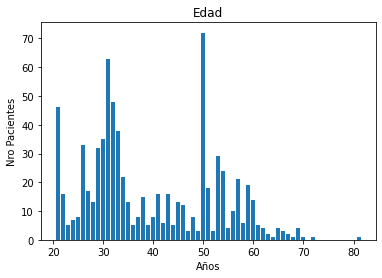

In [473]:
plt.close("all")
valores_x=data["age"].unique()
valores_y=data["age"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[7])
ax=plt.subplot()
ax.set_xlabel("Años")
ax.set_ylabel("Nro Pacientes")
plt.show

<ipython-input-474-d615d82420eb>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


<function matplotlib.pyplot.show(close=None, block=None)>

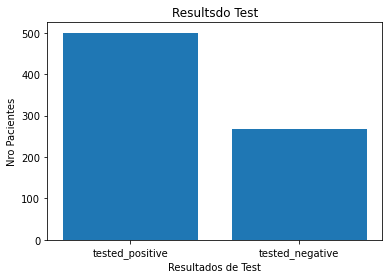

In [474]:
plt.close("all")
valores_x=data["class"].unique()
valores_y=data["class"].value_counts().tolist()
plt.bar(valores_x,valores_y)
plt.title(names[8])
ax=plt.subplot()
ax.set_xlabel("Resultados de Test")
ax.set_ylabel("Nro Pacientes")
plt.show